<a href="https://colab.research.google.com/github/NelsonKimaro/Machine-Learning-project-/blob/main/Data_Science_with_a_Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective of the Project**

The objective of this project, **"Data Science with a Heart,"** is to build a machine learning model that predicts the likelihood of a patient having heart disease.  

The **target variable** is binary:  
- **0** → No heart disease present  
- **1** → Heart disease present  

The dataset originally contains **76 clinical attributes**, but most published studies use a **subset of 14 key features**, which are described below:

| **Column** | **Description** |
|-------------|-----------------|
| **age** | Age in years |
| **sex** | 1 = male; 0 = female |
| **cp** | Chest pain type |
| **trestbps** | Resting blood pressure (in mm Hg on admission) |
| **chol** | Serum cholesterol (in mg/dl) |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) |
| **restecg** | Resting electrocardiographic results |
| **thalach** | Maximum heart rate achieved |
| **exang** | Exercise-induced angina (1 = yes; 0 = no) |
| **oldpeak** | ST depression induced by exercise relative to rest |
| **slope** | Slope of the peak exercise ST segment |
| **ca** | Number of major vessels (0–3) colored by fluoroscopy |
| **thal** | 3 = normal; 6 = fixed defect; 7 = reversible defect |
| **target** | 0 = no heart disease; 1 = heart disease |

The goal is to apply **data science and machine learning techniques** to analyze these features, identify key patterns, and **accurately predict the presence of heart disease** in patients.


# Data Preprosessing
Load, Inspect and Clean Dataset

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)


In [ ]:
# #Manually upload data file to Colab
# from google.colab import files
# uploaded = files.upload()

#Import Data from Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Load and Inspeact first # rows of the dataframe
file_path = '/content/drive/MyDrive/Colab Notebooks/heart(in).csv'
data = pd.read_csv(file_path)
# data = pd.read_csv('heart(in).csv')
# data.head(10)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Rename columns
df=data.rename(columns={'cp': 'chest_pain', 'trestbps':'blood_pressure', 'chol':'cholestrol', 'fbs':'blood_sugar',
                                      'restecg':'electrocardiographic', 'thalach':'max_heart_rate', 'exang':'exercise_induced',
                                      'oldpeak':'ST_depression'})

In [ ]:
#Inspect last # rows of the dataframe
df.tail(10)


,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,electrocardiographic,max_heart_rate,exercise_induced,ST_depression,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
#Show the shape(row, column) of the dataframe
df.shape


(303, 14)

In [ ]:
#Show info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   303 non-null    int64  
 1   sex                   303 non-null    int64  
 2   chest_pain            303 non-null    int64  
 3   blood_pressure        303 non-null    int64  
 4   cholestrol            303 non-null    int64  
 5   blood_sugar           303 non-null    int64  
 6   electrocardiographic  303 non-null    int64  
 7   max_heart_rate        303 non-null    int64  
 8   exercise_induced      303 non-null    int64  
 9   ST_depression         303 non-null    float64
 10  slope                 303 non-null    int64  
 11  ca                    303 non-null    int64  
 12  thal                  303 non-null    int64  
 13  target                303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Describe the dataframe
df.describe()

,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,electrocardiographic,max_heart_rate,exercise_induced,ST_depression,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**A. Handling misssing values**

Missing data can cause errors or bias in a model.


In [ ]:
#Check if there is any missing value and handle it
df.isnull().sum()

,0
age,0
sex,0
chest_pain,0
blood_pressure,0
cholestrol,0
blood_sugar,0
electrocardiographic,0
max_heart_rate,0
exercise_induced,0
ST_depression,0


**B. Check for Duplicates** ###################################

Sometimes the dataset contains repeated records.

In [ ]:
duplicates = df.duplicated()
print(df[df.duplicated()])

     age  sex  chest_pain  blood_pressure  cholestrol  blood_sugar  \
164   38    1           2             138         175            0   

     electrocardiographic  max_heart_rate  exercise_induced  ST_depression  \
164                     1             173                 0            0.0   

     slope  ca  thal  target  
164      2   4     2       1  


**C. Check for Outliers** ##########################################

Outliers can distort averages and model performance.

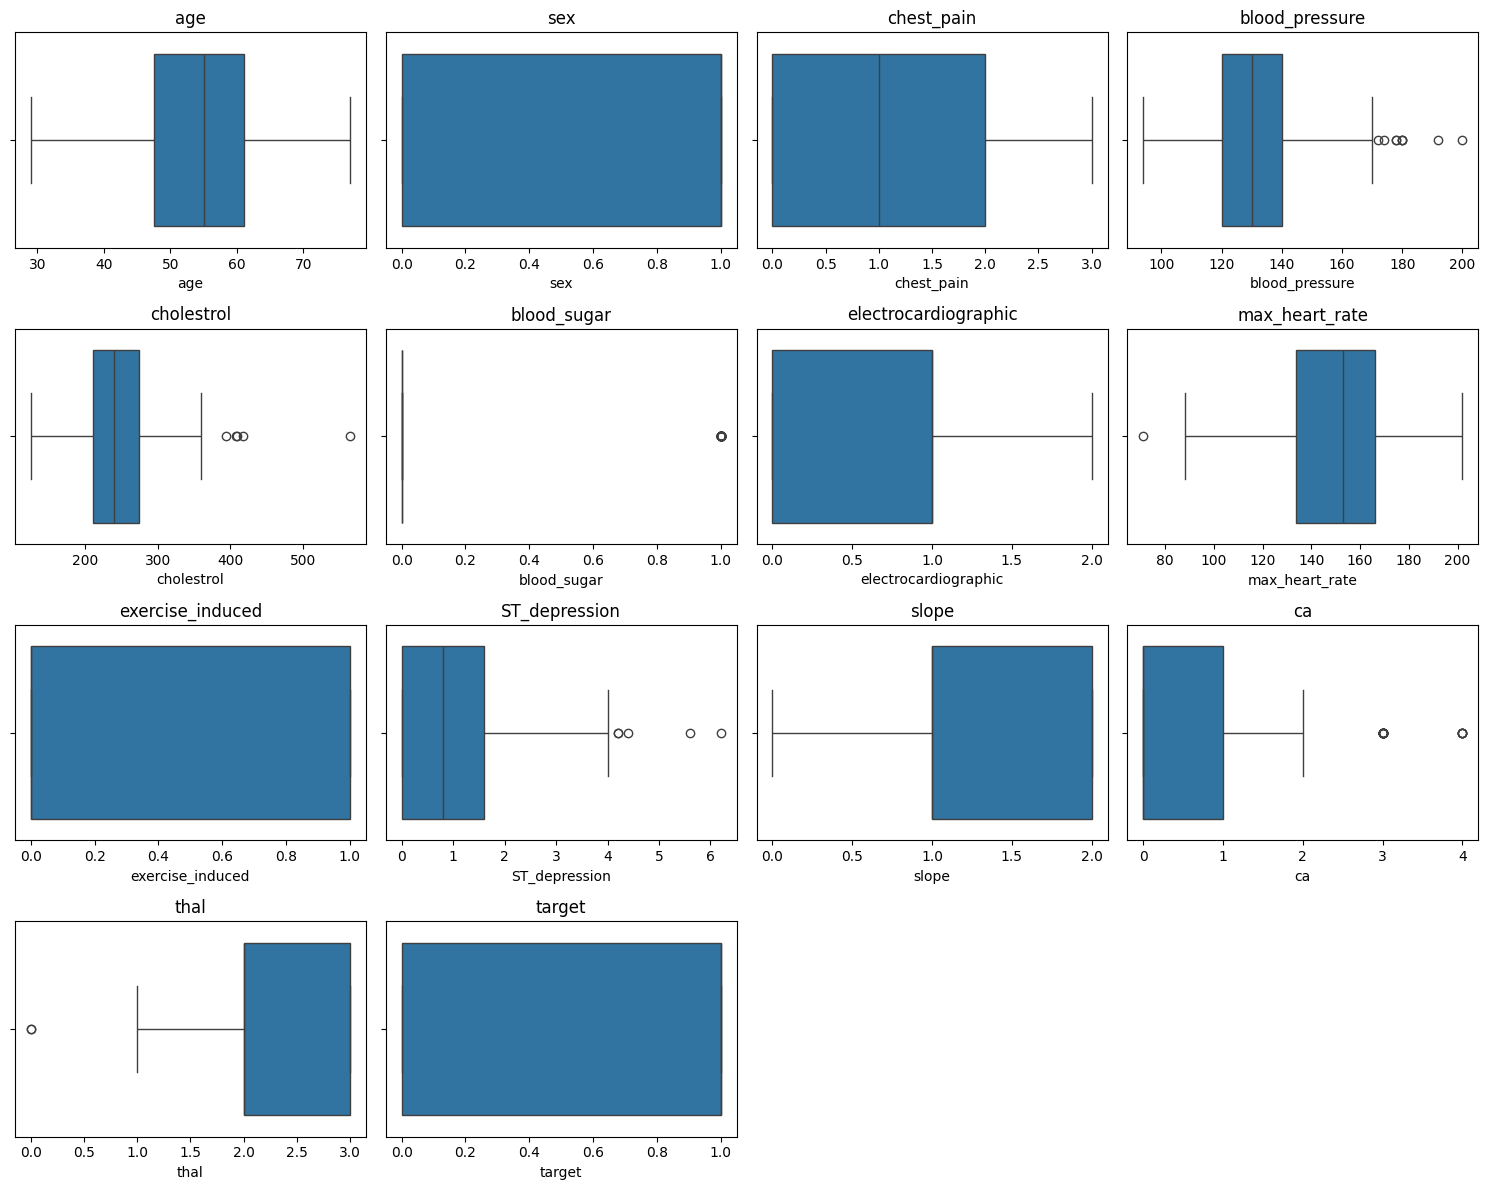

In [ ]:
# pick only numerical columns

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)   # adjust rows/cols depending on number of features
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


**D. Encoding Categorical Variables**

Convert non-numeric features (if any) to numeric format

In [ ]:
print(df.dtypes)

age                       int64
sex                       int64
chest_pain                int64
blood_pressure            int64
cholestrol                int64
blood_sugar               int64
electrocardiographic      int64
max_heart_rate            int64
exercise_induced          int64
ST_depression           float64
slope                     int64
ca                        int64
thal                      int64
target                    int64
dtype: object


**E. Standardize or Normalize Values** ##########################################

Some features (like trestbps, chol, thalach) have different scales.
Normalization ensures fair contribution in models.

In [ ]:

scaler = StandardScaler()
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])


KeyError: "['trestbps', 'chol', 'thalach', 'oldpeak'] not in index"

**F. Check Target Balance**

Check if your target (target) is balanced — important for fair model learning. Usually, a dataset is considered balanced if each class is roughly 50% ± 10%.

In [ ]:
#Count target value
df['target'].value_counts()


,count
target,
1,165
0,138


**G. Feature Correlation and Relevance**

Remove unnecessary or highly correlated features (to avoid redundancy).
If two columns are >0.9 correlated, keep only one


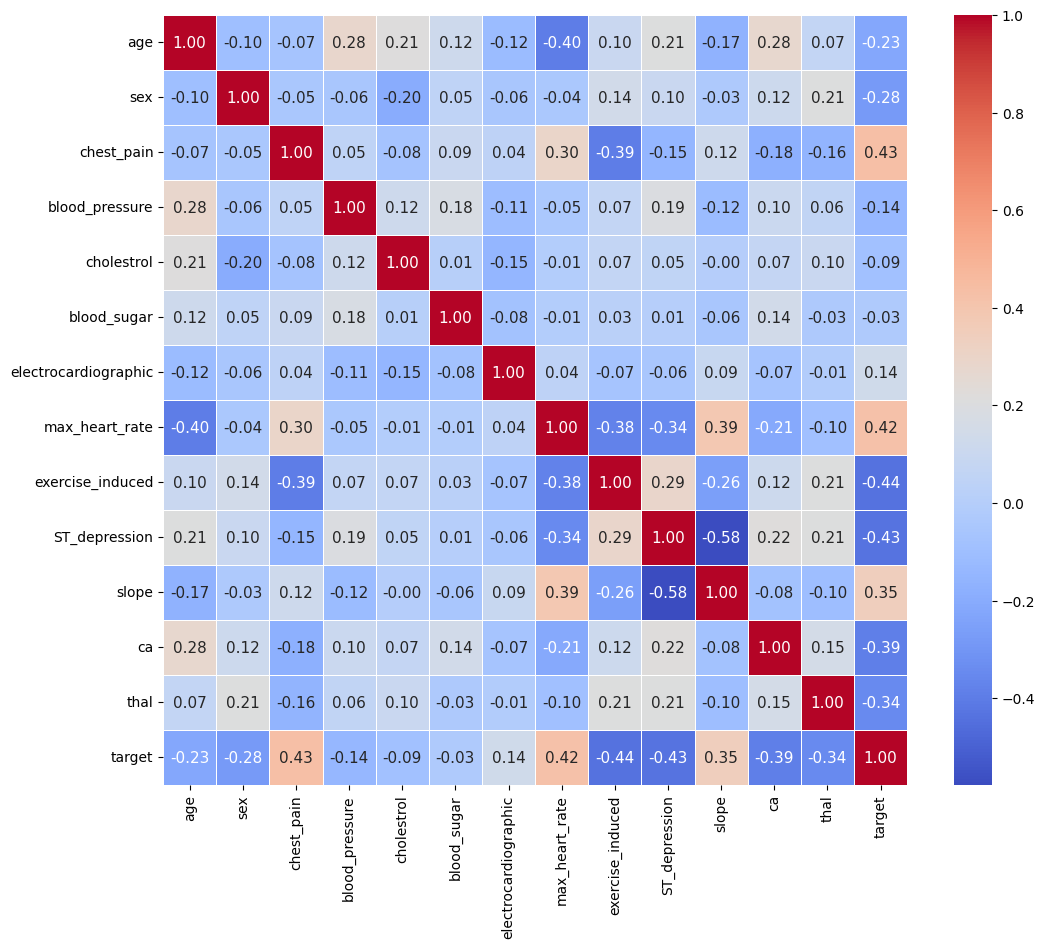

In [ ]:
corr = df.corr()

# Set figure size
plt.figure(figsize=(12, 10))

# Plot heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    annot_kws={"size": 11},  # font size of numbers
    linewidths=0.5
)

plt.show()


Alternative: Scatter Diagram

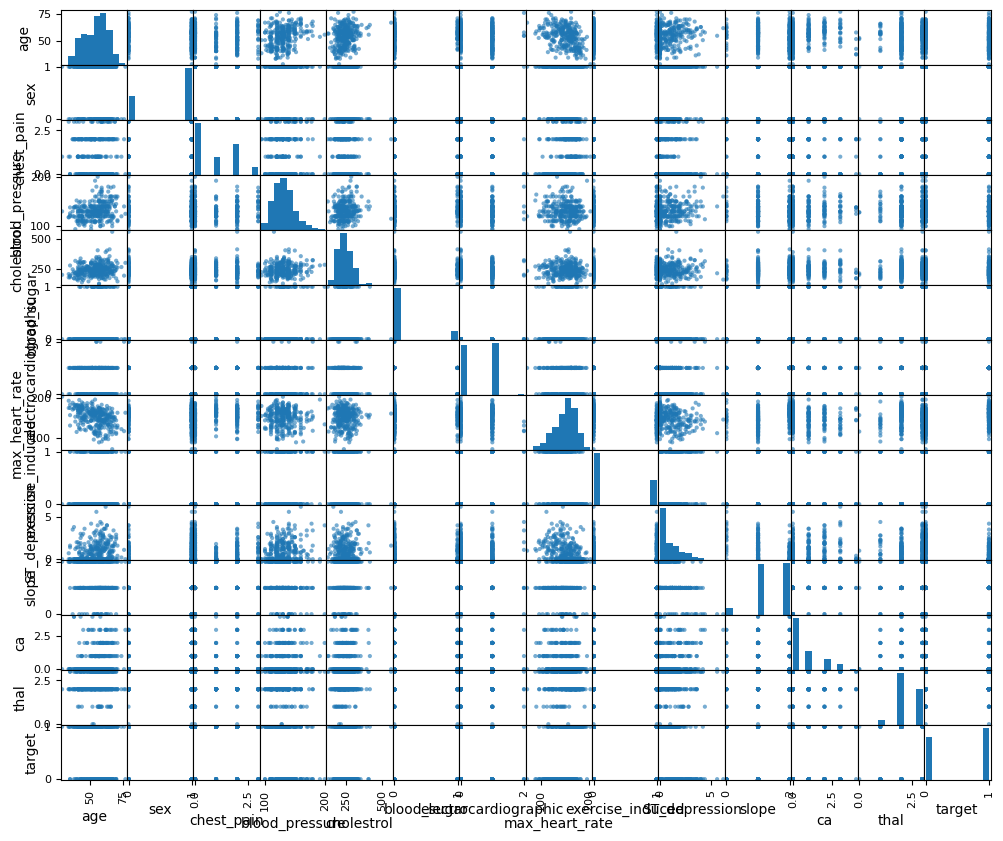

In [ ]:
corr = df.corr()

# Scatter matrix
pd.plotting.scatter_matrix(
    df,
    figsize=(12, 10),
    diagonal="hist",   # histogram on diagonal
    alpha=0.6
)

plt.show()


<Figure size 1500x2000 with 0 Axes>

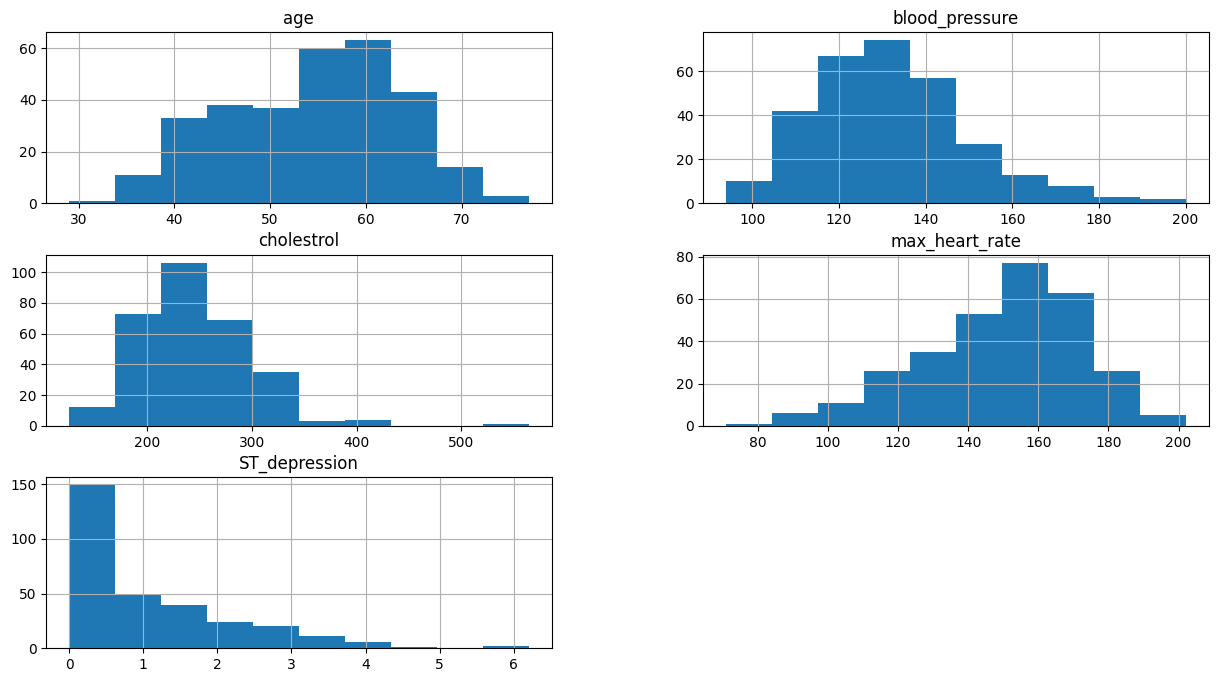

<Figure size 1500x2000 with 0 Axes>

In [ ]:
#continuous variables distribution

plt.rcParams['figure.figsize']= (15,8) # reajustar o tamanho da figura

df[[ 'age','blood_pressure', 'cholestrol', 'max_heart_rate', 'ST_depression']].hist();
plt.figure(figsize=(15, 20))

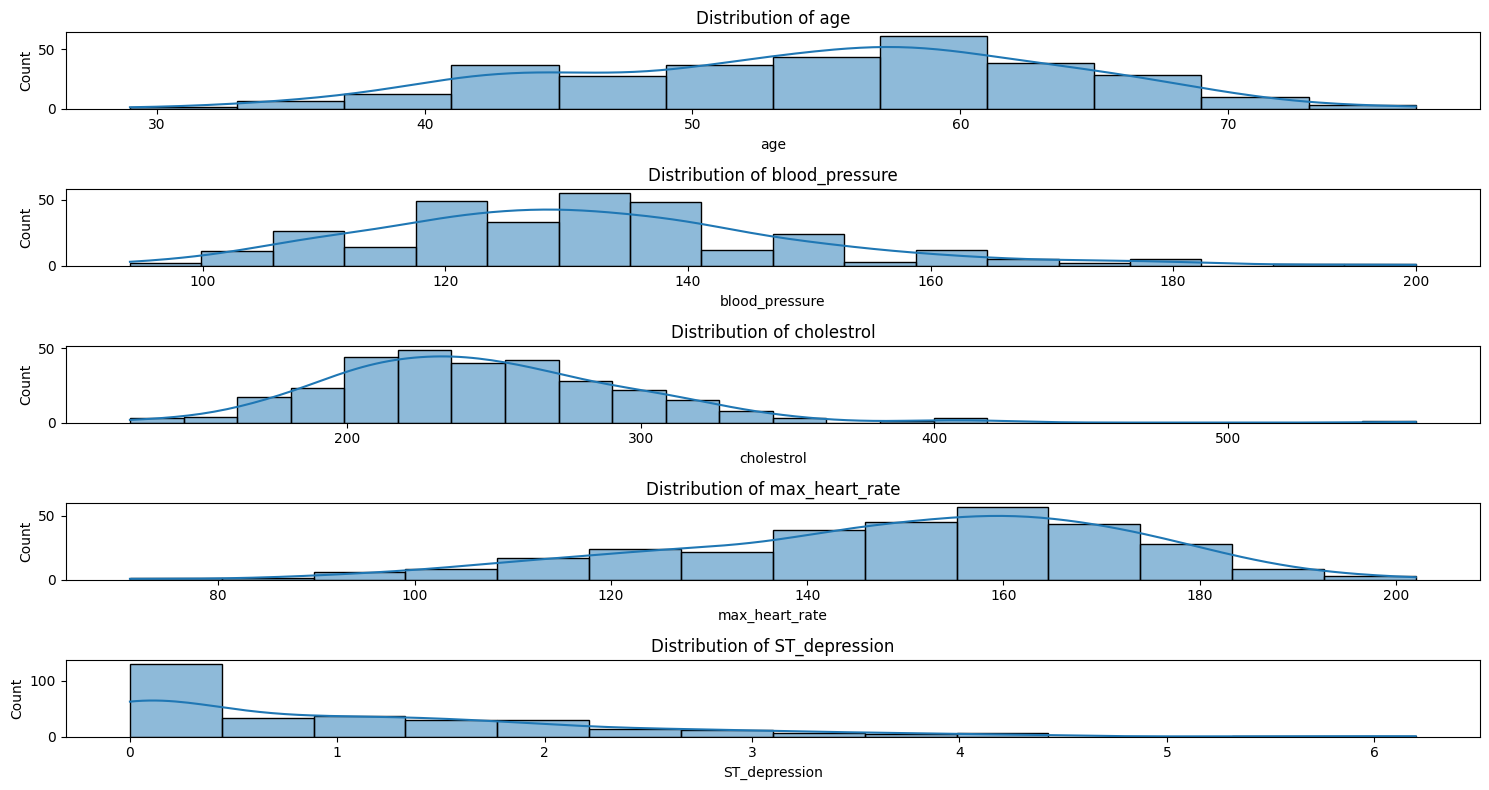

In [ ]:
# Select only numerical columns
# num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = ['age', 'blood_pressure', 'cholestrol', 'max_heart_rate', 'ST_depression']


for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# Feature Engineering & Train-Test Splitting

Objective is to manipulate data with Pandas (groupby), explore features, and prepare data for modelling

In [ ]:
# 1. Check min/max age
min_age = df["age"].min()
max_age = df["age"].max()

print("Minimum age:", min_age)
print("Maximum age:", max_age)

# 2. Create bins that actually fit the data
# Round down min_age to nearest 10, and round up max_age to nearest 10
bin_start = (min_age // 10) * 10
bin_end   = ((max_age // 10) + 1) * 10

bins = list(range(int(bin_start), int(bin_end) + 1, 10))

# 3. Create labels dynamically
labels = []
for i in range(len(bins) - 1):
    left = bins[i]
    right = bins[i+1]
    labels.append(f"{left + (0 if i == 0 else 1)}-{right}")

labels[0] = f"{bins[0]}-{bins[1]}"   # fix first label

# 4. Cut into bins
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, include_lowest=True)

# 5. Group and compute count and mean
summary = df.groupby("age_group", observed=True).agg(
    count=("target", "count"),
    mean=("target", "mean")
)

print(summary)



Minimum age: 29
Maximum age: 77
           count      mean
age_group                 
20-30          1  1.000000
31-40         18  0.666667
41-50         76  0.697368
51-60        129  0.496124
61-70         73  0.410959
71-80          6  0.833333


##Train, Validation & Test Split

Splitting the cleaned dataset into train, validation and tests sets

In [ ]:

# df.drop('age_group', axis=1, inplace=True)

X, y = df.drop('target', axis=1), df['target']

# First split into train and temp (val+test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(len(X_train), len(X_val), len(X_test))
X_test


212 45 46


,age,sex,chest_pain,blood_pressure,cholestrol,blood_sugar,electrocardiographic,max_heart_rate,exercise_induced,ST_depression,slope,ca,thal
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


# Model Training

# K- Nearest neighbors

In [ ]:
#KNN Pipeline (Scaler + Model)
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(
        n_neighbors=5,
        metric='minkowski',
        p=2
    ))
])



#  Hyperparameter Grid

In [ ]:
param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
    'knn__p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

In [ ]:
# GridSearchCV
grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski', 'euclidean', 'manhattan'],
                         'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [ ]:
# Best Model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_knn = grid_search.best_estimator_

Best Parameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'uniform'}
Best CV Accuracy: 0.8345514950166113


In [ ]:
#Validation Performance
y_val_pred = best_knn.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.9333333333333333


# Performance Metrics (Test Set)

In [ ]:
 #Test Performance
y_test_pred = best_knn.predict(X_test)
y_test_prob = best_knn.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("\nTest Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Test Accuracy: 0.7608695652173914
Precision: 0.7586206896551724
Recall: 0.8461538461538461
F1 Score: 0.8


In [ ]:
#Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))



Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.76      0.85      0.80        26

    accuracy                           0.76        46
   macro avg       0.76      0.75      0.75        46
weighted avg       0.76      0.76      0.76        46



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[13  7]
 [ 4 22]]


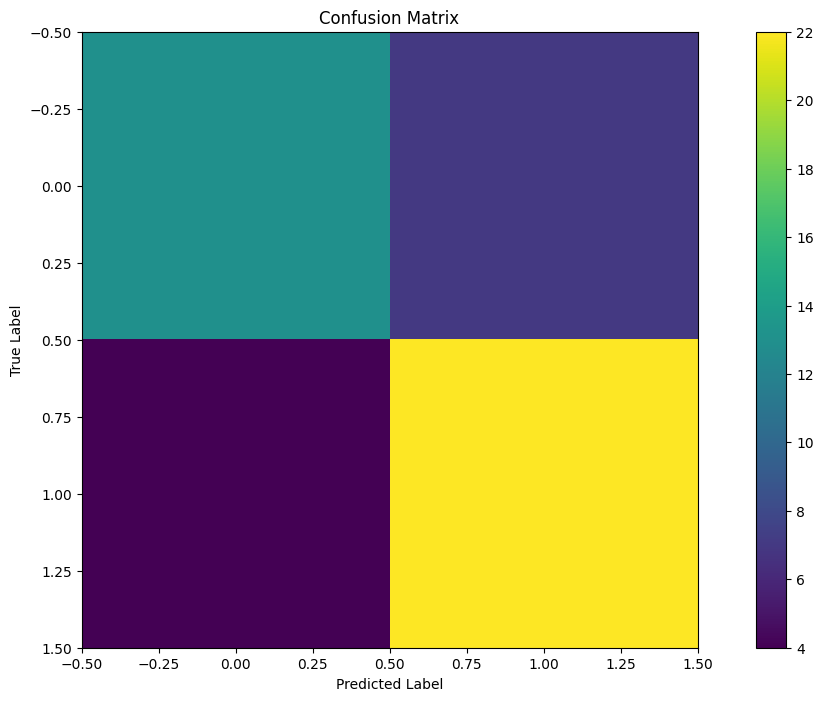

In [ ]:
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()
plt.show()

ROC-AUC Score: 0.7913461538461539


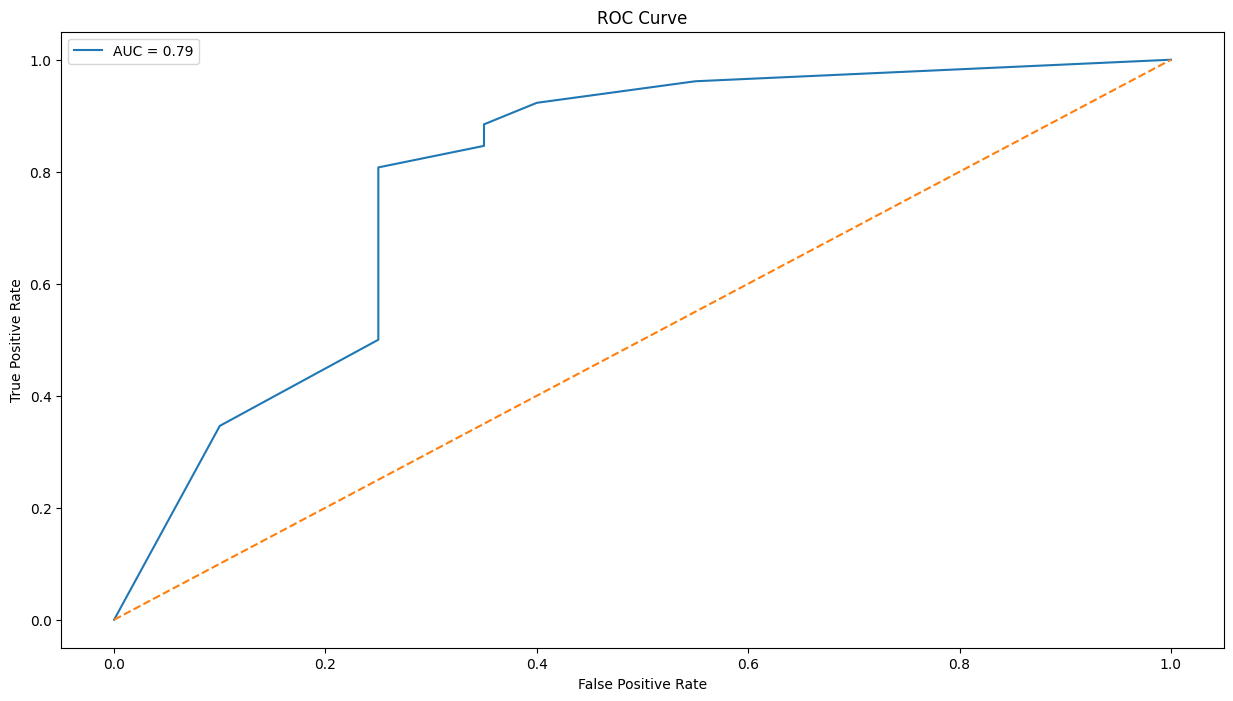

In [ ]:
# ROC-AUC & Curve
roc_auc = roc_auc_score(y_test, y_test_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_test_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()